In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 16

In [2]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_4_1'
num_samples = 120
num_steps = 40

df_list = []
for i in range(1):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df['run'] = i
    df_list.append(df)

In [3]:
def sort_df(df_list, score='energy'):
    df = pd.concat(df_list)
    if score == 'energy':
        result_df = df.copy().sort_values(by=score, ascending=True).groupby('id')
    elif score == 'confidence_logits':
        result_df = df.copy().sort_values(by=score, ascending=False).groupby('id')
    top1 = result_df.head(1).copy()
    top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    # merge dataframes
    top1['method'] = 'Top-1'
    top5['method'] = 'Top-5'
    top10['method'] = 'Top-10'
    top25['method'] = 'Top-25'
    best['method'] = 'Oracle'

    # merge the dataframes 
    df_merged = pd.concat([top1, top5, top10, top25, best])

    # get the order
    cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

    df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

    # separate for each metric
    df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

    df_sr = pd.DataFrame()
    df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
    df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
    df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
    df_sr = df_sr.reset_index()
    return df_sr, top1, best

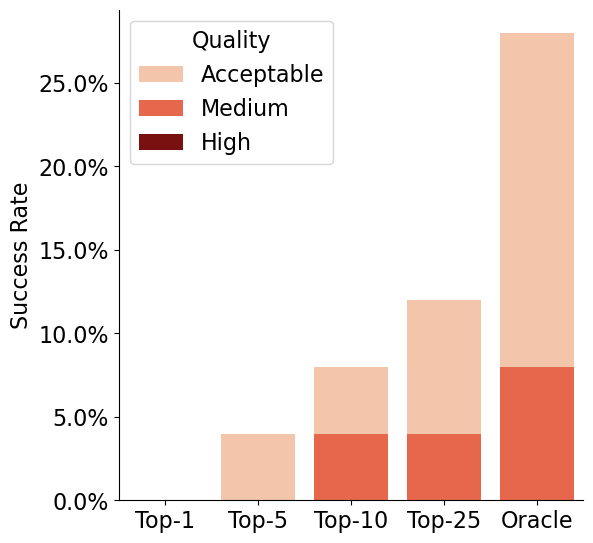

In [4]:
df_sr, top1, best = sort_df(df_list, score='energy')
melted_df = pd.melt(df_sr, id_vars='method', var_name='Quality', value_name='Success Rate')

# Define custom colors for pastel red, muted red, and dark red
custom_palette = ["#FFC3A0", "#FF5733", "#8B0000"]

g = sns.catplot(
    data=melted_df, 
    kind='bar', 
    x='method', 
    y='Success Rate', 
    hue='Quality', 
    dodge=False, 
    palette=custom_palette,
    height=6,
    aspect=1,
    legend_out=False,
) 

g.set_xlabels("")
g.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.ylim(0, 0.5)
plt.xticks(rotation=0)
#plt.savefig('DFMDock_db5_ab_ag.png', dpi=300, bbox_inches="tight")
plt.show()

In [5]:
merged_df = pd.merge(top1, best, on='id', suffixes=('_top1', '_best'))
merged_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
0,6B0S,86,12.253371,13.785075,39.482819,0.000000,0.018665,-0.050905,0.111203,5,...,6.877972,10.624479,20.255449,0.000000,0.056425,-0.050679,0.099676,6,0,Oracle
1,2SNI,83,4.446624,4.212195,12.413079,0.093750,0.175170,-0.050718,0.146525,1,...,3.724011,3.171359,12.045258,0.406250,0.307165,-0.050426,0.143936,4,0,Oracle
2,2AYO,50,11.243979,13.226952,30.156412,0.000000,0.028766,-0.050705,0.167903,0,...,8.619027,9.406522,24.861443,0.000000,0.043152,-0.050547,0.169180,1,0,Oracle
3,2VDB,79,13.346964,21.095839,49.451782,0.000000,0.011242,-0.050656,0.082845,1,...,4.946240,7.998411,17.544811,0.000000,0.074691,-0.049230,0.064023,1,0,Oracle
4,2A9K,16,18.985901,21.556980,61.749447,0.000000,0.007805,-0.050540,0.109990,0,...,19.145790,13.118436,36.080570,0.000000,0.021829,-0.048369,0.116985,1,0,Oracle
5,2SIC,19,9.951370,7.939256,20.987972,0.257143,0.144172,-0.050495,0.121399,12,...,3.728336,3.730893,9.027884,0.257143,0.288735,-0.050201,0.146395,6,0,Oracle
6,1JIW,54,12.309775,17.257845,38.685303,0.000000,0.017851,-0.050108,0.084631,5,...,7.774720,7.833302,25.894146,0.000000,0.044215,-0.049116,0.096588,5,0,Oracle
7,2A1A,21,26.458483,24.289305,75.453476,0.000000,0.005444,-0.049952,0.172956,0,...,11.380253,11.138029,23.423399,0.000000,0.044725,-0.049552,0.197908,1,0,Oracle
8,5C7X,81,3.985597,6.298604,9.787995,0.000000,0.161197,-0.049748,0.041398,2,...,3.679603,4.132712,9.011319,0.235294,0.274174,-0.049370,0.052176,5,0,Oracle
9,1VFB,82,12.869192,12.722702,22.090961,0.000000,0.047556,-0.049706,0.110228,0,...,8.272592,6.057049,16.326431,0.000000,0.090345,-0.048767,0.108179,13,0,Oracle


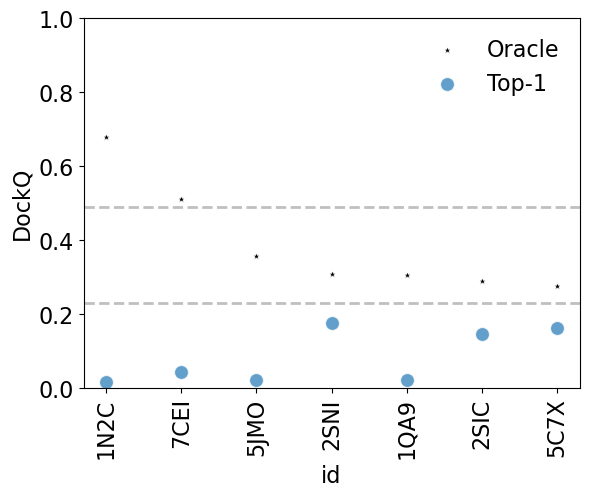

In [6]:
merged_df = merged_df.sort_values(by='DockQ_best', ascending=False)
filtered_df = merged_df[merged_df['DockQ_best'] >= 0.23]

sns.scatterplot(data=filtered_df, x='id', y='DockQ_best', label='Oracle', color='black', marker='*', s=30, alpha=1.0)
sns.scatterplot(data=filtered_df, x='id', y='DockQ_top1', label='Top-1', marker='o', s=100, alpha=0.7)
plt.axhline(y=0.23, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.axhline(y=0.49, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.legend(frameon=False)
plt.ylabel('DockQ')
plt.ylim(0, 1)
plt.show()

In [7]:
filtered_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
22,1N2C,9,23.021240,19.754080,39.351795,0.000000,0.016770,-0.049018,0.110169,55,...,2.163555,1.966487,4.377194,0.877551,0.678590,-0.048526,0.099765,8,0,Oracle
12,7CEI,9,12.631348,10.911960,23.878847,0.000000,0.043669,-0.049609,0.111979,0,...,3.037615,2.710716,5.627263,0.600000,0.509899,-0.048787,0.113821,2,0,Oracle
20,5JMO,23,12.033982,13.135805,38.411362,0.000000,0.019852,-0.049116,0.101499,7,...,11.306952,7.277534,50.428177,0.999999,0.356126,-0.047131,0.087708,39,0,Oracle
1,2SNI,83,4.446624,4.212195,12.413079,0.093750,0.175170,-0.050718,0.146525,1,...,3.724011,3.171359,12.045258,0.406250,0.307165,-0.050426,0.143936,4,0,Oracle
14,1QA9,30,10.347795,9.885399,42.974739,0.000000,0.020052,-0.049522,0.128741,1,...,4.342752,4.663823,12.351191,0.500000,0.305046,-0.048830,0.116288,5,0,Oracle
5,2SIC,19,9.951370,7.939256,20.987972,0.257143,0.144172,-0.050495,0.121399,12,...,3.728336,3.730893,9.027884,0.257143,0.288735,-0.050201,0.146395,6,0,Oracle
8,5C7X,81,3.985597,6.298604,9.787995,0.000000,0.161197,-0.049748,0.041398,2,...,3.679603,4.132712,9.011319,0.235294,0.274174,-0.049370,0.052176,5,0,Oracle


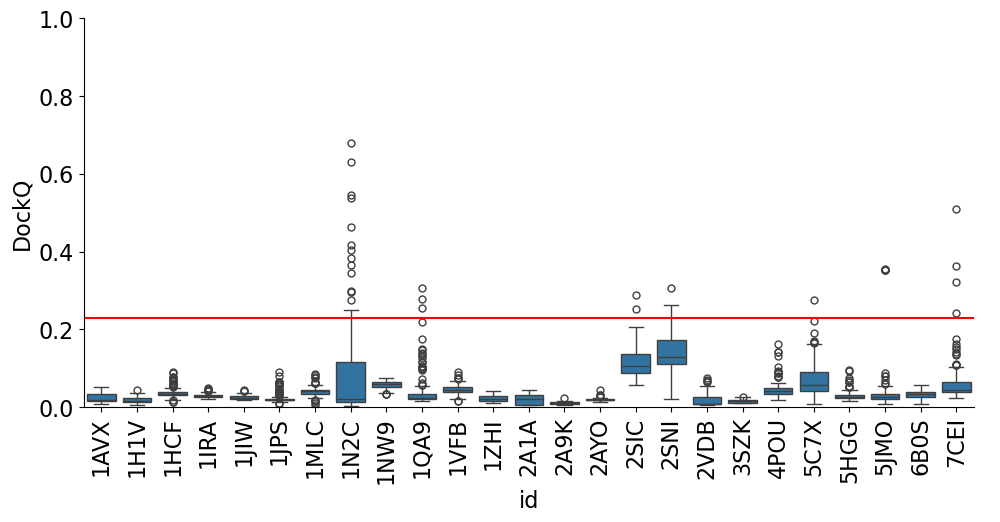

In [8]:
sns.catplot(data=df, x='id', y='DockQ', kind='box', height=5, aspect=2)
plt.xticks(rotation=90)
plt.axhline(y = 0.23, color='r')
plt.ylim(0, 1)
plt.show()